In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [3]:
%cd '/content/drive/MyDrive/DATA 245/Project'

/content/drive/.shortcut-targets-by-id/1dBaisw15vXAkSJcnz0pO83MeXqW6AHFn/DATA 245/Project


In [4]:
# Read the pickle file
file_path = '02 artifacts/processed_dataset_WQ.pkl'
try:
    df_pickle = pd.read_pickle(file_path)
    print(f"Successfully read '{file_path}'")
    display(df_pickle.head())
except FileNotFoundError:
    print(f"File not found at {file_path}. Please check the path.")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully read '02 artifacts/processed_dataset_WQ.pkl'


,station_id,station_name,station_number,full_station_name,station_type,latitude,longitude,county_name,sample_code,sample_date,...,Turbidity_NTU,WaterTemperature_°C,pH_pH units,qi_DO,qi_pH,qi_Cond,qi_Turb,qi_Temp,WQI,WQI_Class
0,1,AMERICAN,A0714010,American River at Water Treatment Plant,Surface Water,38.5596,-121.4169,Sacramento,C0114B0005,2014-01-06 12:14:00,...,2.28,10.18,7.60,87.000000,100.0,95.600000,97.72,50.90,89.854000,Good
1,1,AMERICAN,A0714010,American River at Water Treatment Plant,Surface Water,38.5596,-121.4169,Sacramento,C0115B0005,2015-01-05 11:53:00,...,1.41,10.75,7.91,83.857143,100.0,94.666667,98.59,53.75,89.183476,Good
2,1,AMERICAN,A0714010,American River at Water Treatment Plant,Surface Water,38.5596,-121.4169,Sacramento,C0117B0081,2017-01-10 14:00:00,...,160.00,9.24,7.26,93.142857,100.0,96.533333,0.00,46.20,71.869524,Moderate
3,1,AMERICAN,A0714010,American River at Water Treatment Plant,Surface Water,38.5596,-121.4169,Sacramento,C0118B0005,2018-01-08 11:40:00,...,3.00,10.80,8.36,79.428571,100.0,96.600000,97.00,54.00,87.948571,Good
4,1,AMERICAN,A0714010,American River at Water Treatment Plant,Surface Water,38.5596,-121.4169,Sacramento,C0119B0011,2019-01-07 14:15:00,...,2.10,11.00,7.71,81.857143,100.0,95.680000,97.90,55.00,88.773143,Good


In [7]:
print(df_pickle.columns.tolist())
print(df_pickle.info())

['station_id', 'station_name', 'station_number', 'full_station_name', 'station_type', 'latitude', 'longitude', 'county_name', 'sample_code', 'sample_date', 'year', 'sample_depth_meter', 'DissolvedOxygen_mg/L', 'SpecificConductance_µS/cm', 'Turbidity_NTU', 'WaterTemperature_°C', 'pH_pH units', 'qi_DO', 'qi_pH', 'qi_Cond', 'qi_Turb', 'qi_Temp', 'WQI', 'WQI_Class']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53697 entries, 0 to 53696
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   station_id                 53697 non-null  int64         
 1   station_name               53697 non-null  object        
 2   station_number             53697 non-null  object        
 3   full_station_name          53697 non-null  object        
 4   station_type               53697 non-null  object        
 5   latitude                   53697 non-null  float64       
 6   longitude        

In [12]:
selected_cols = [
    'station_id',
    'latitude',
    'longitude',
    'sample_date',
    'DissolvedOxygen_mg/L',
    'SpecificConductance_µS/cm',
    'Turbidity_NTU',
    'WaterTemperature_°C',
    'pH_pH units'
]

df_selected = df_pickle[selected_cols]

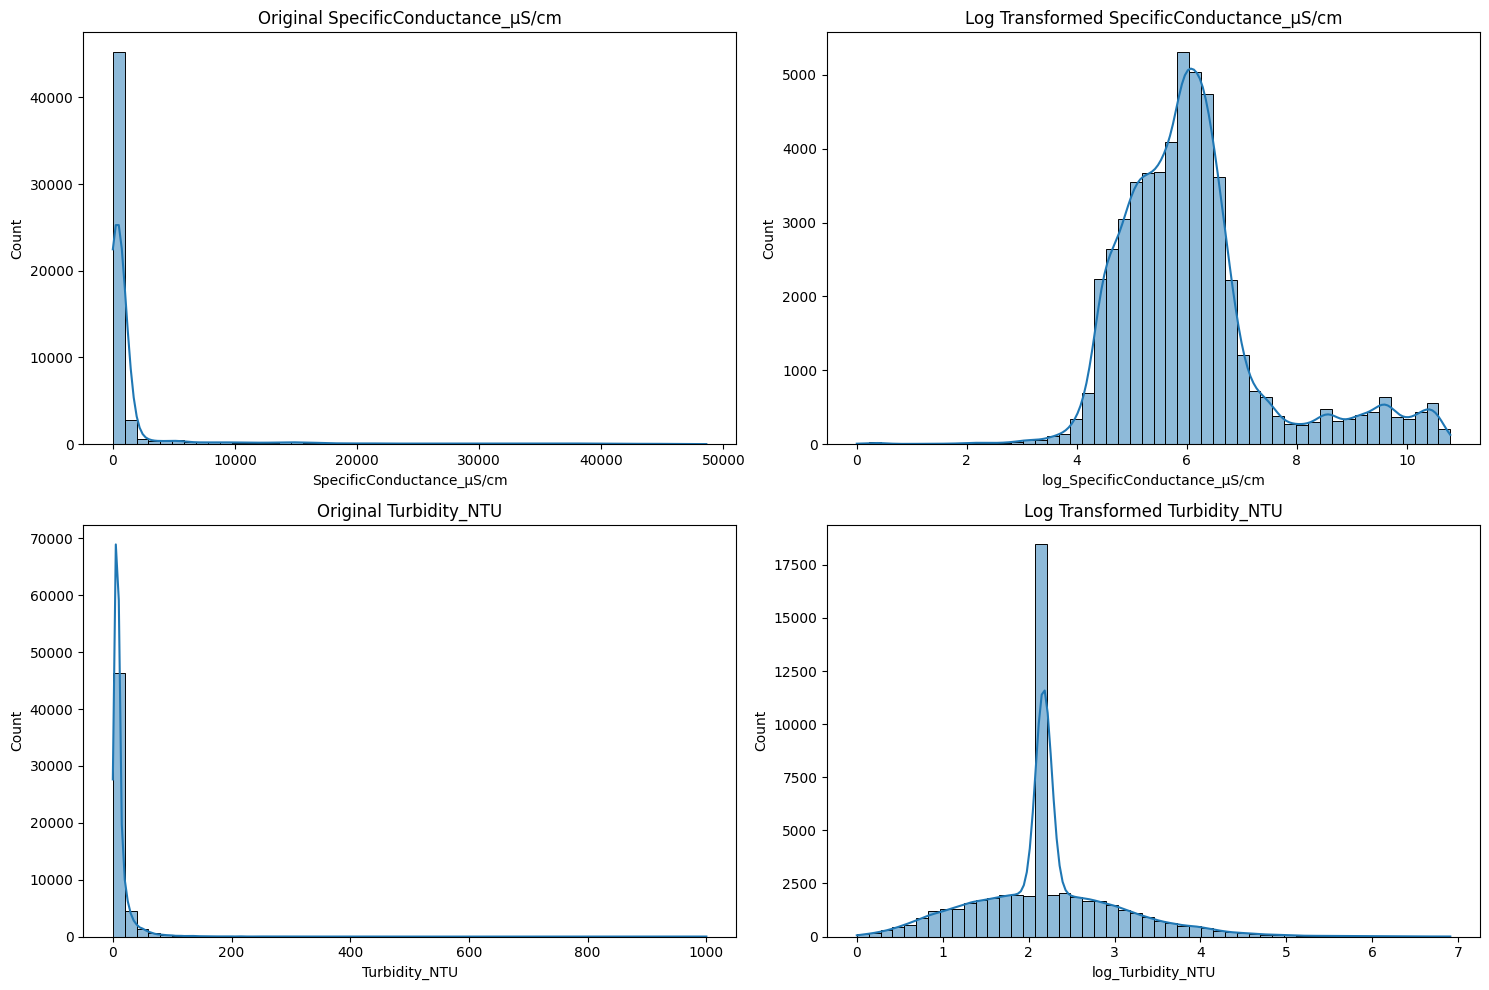

,SpecificConductance_µS/cm,log_SpecificConductance_µS/cm,Turbidity_NTU,log_Turbidity_NTU
27244,182.0,5.209486,5.98,1.943049
162,55.0,4.025352,2.80,1.335001
12954,486.0,6.188264,15.40,2.797281
2689,167.0,5.123964,8.45,2.246015
1631,949.0,6.856462,49.30,3.918005


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_selected = df_selected.copy()


df_selected['log_SpecificConductance_µS/cm'] = np.log1p(df_selected['SpecificConductance_µS/cm'])
df_selected['log_Turbidity_NTU'] = np.log1p(df_selected['Turbidity_NTU'])

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df_selected['SpecificConductance_µS/cm'], kde=True, ax=axes[0, 0], bins=50)
axes[0, 0].set_title('Original SpecificConductance_µS/cm')


sns.histplot(df_selected['log_SpecificConductance_µS/cm'], kde=True, ax=axes[0, 1], bins=50)
axes[0, 1].set_title('Log Transformed SpecificConductance_µS/cm')

sns.histplot(df_selected['Turbidity_NTU'], kde=True, ax=axes[1, 0], bins=50)
axes[1, 0].set_title('Original Turbidity_NTU')


sns.histplot(df_selected['log_Turbidity_NTU'], kde=True, ax=axes[1, 1], bins=50)
axes[1, 1].set_title('Log Transformed Turbidity_NTU')

plt.tight_layout()
plt.show()

display(df_selected[['SpecificConductance_µS/cm', 'log_SpecificConductance_µS/cm', 'Turbidity_NTU', 'log_Turbidity_NTU']].head())

In [17]:
df_selected

,station_id,latitude,longitude,sample_date,DissolvedOxygen_mg/L,SpecificConductance_µS/cm,Turbidity_NTU,WaterTemperature_°C,pH_pH units,log_SpecificConductance_µS/cm,log_Turbidity_NTU
27244,45916,38.367700,-121.520500,2000-01-03 09:55:00,11.50,182.0,5.98,8.80,7.50,5.209486,1.943049
162,1,38.559600,-121.416900,2000-01-03 10:55:00,11.50,55.0,2.80,9.50,8.00,4.025352,1.335001
12954,1362,38.611164,-121.467411,2000-01-03 11:35:00,11.60,486.0,15.40,9.10,7.90,6.188264,2.797281
2689,114,38.598000,-121.549400,2000-01-03 12:40:00,11.20,167.0,8.45,9.70,7.90,5.123964,2.246015
1631,78,38.096600,-121.651100,2000-01-04 10:45:00,4.00,949.0,49.30,8.70,6.80,6.856462,3.918005
...,...,...,...,...,...,...,...,...,...,...,...
3443,145,38.474900,-121.588300,2025-07-07 07:46:00,8.86,334.0,7.80,23.10,7.71,5.814131,2.174752
48329,47529,38.353461,-121.642975,2025-07-07 08:52:00,8.86,208.0,7.80,22.10,7.71,5.342334,2.174752
9969,846,38.123600,-122.081100,2025-07-08 08:15:00,7.54,375.0,34.07,20.06,7.80,5.929589,3.557346
44780,47116,38.535800,-121.520600,2025-07-08 09:39:00,8.86,110.0,7.80,20.10,7.71,4.709530,2.174752


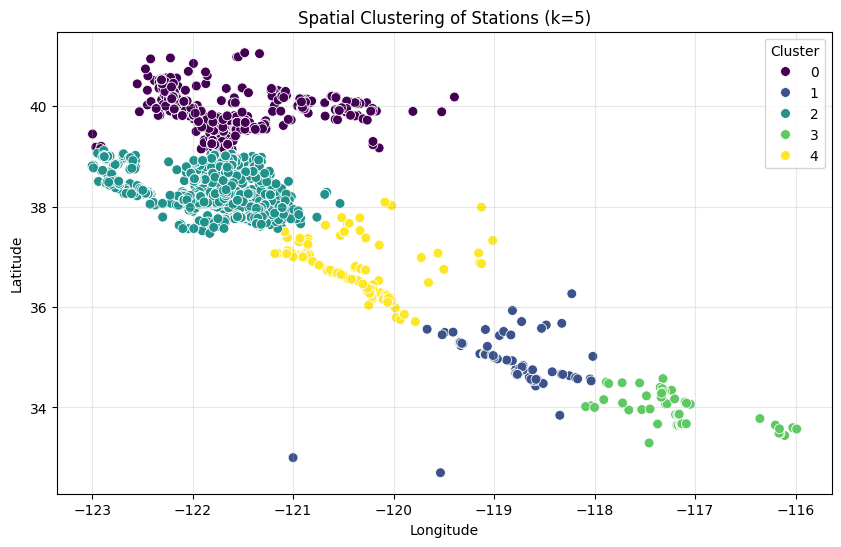

New Spatial Features Added:


,station_id,latitude,longitude,spatial_cluster,avg_DissolvedOxygen_mg/L
0,45916,38.367700,-121.520500,2,9.038659
1,1,38.559600,-121.416900,2,9.763639
2,1362,38.611164,-121.467411,2,8.036075
3,114,38.598000,-121.549400,2,9.262919
4,78,38.096600,-121.651100,2,4.653500


In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Spatial Clustering with K-Means
# -------------------------------------------------------
# We use Lat/Lon to create 'k' spatial clusters (regions)

# Define the number of clusters (e.g., 5 regions)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# Fit on unique stations to avoid bias from frequent sampling at one location
unique_stations = df_selected[['station_id', 'latitude', 'longitude']].drop_duplicates()

# Create clusters
unique_stations['spatial_cluster'] = kmeans.fit_predict(unique_stations[['latitude', 'longitude']])

# Merge the cluster labels back to the main dataframe
df_selected = df_selected.merge(unique_stations[['station_id', 'spatial_cluster']], on='station_id', how='left')

# Visualize the Spatial Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=unique_stations, x='longitude', y='latitude', hue='spatial_cluster', palette='viridis', s=50)
plt.title(f'Spatial Clustering of Stations (k={k})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

# 2. Target Encoding for Station ID
# -------------------------------------------------------
# Replace station_id with the mean Dissolved Oxygen for that station.
# WARNING: To prevent data leakage, compute means on TRAIN data only and map to TEST.

# Example of how to compute the mapping (Simulated on full data for demo purposes)
station_target_mean = df_selected.groupby('station_id')['DissolvedOxygen_mg/L'].mean()

# Create the new feature
df_selected['avg_DissolvedOxygen_mg/L'] = df_selected['station_id'].map(station_target_mean)

# Display the new features
print("New Spatial Features Added:")
display(df_selected[['station_id', 'latitude', 'longitude', 'spatial_cluster', 'avg_DissolvedOxygen_mg/L']].head())

Training Set: 2000 to 2018 (42957 samples)
Testing Set:  2018 to 2025 (10740 samples)

New Model Performance (Time-Split + Temporal Features):
RMSE: 1.5524
R2 Score: 0.2369


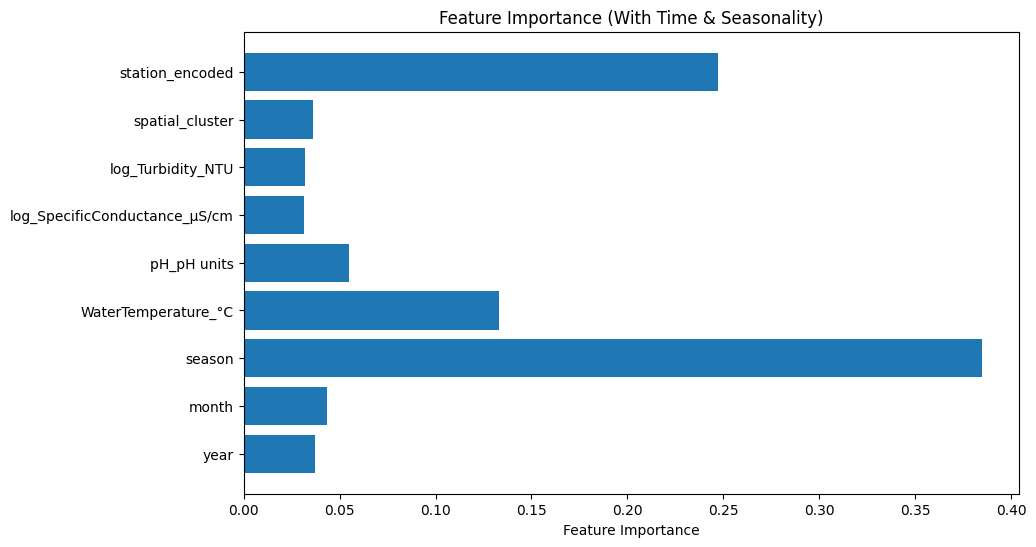

In [23]:
import pandas as pd
import numpy as np

# 1. Feature Engineering: Temporal Features
# -------------------------------------------------------
# We extract cyclical patterns which are crucial for Water Quality

df_selected['sample_date'] = pd.to_datetime(df_selected['sample_date'])

# Extract features
df_selected['year'] = df_selected['sample_date'].dt.year
df_selected['month'] = df_selected['sample_date'].dt.month

# Create a 'Season' feature (Northern Hemisphere)
# 1: Winter, 2: Spring, 3: Summer, 4: Fall
df_selected['season'] = (df_selected['month'] % 12 + 3) // 3

# 2. Proper Time-Based Split
# -------------------------------------------------------
# We sort by date to ensure we respect the timeline
df_sorted = df_selected.sort_values('sample_date').reset_index(drop=True)

# Define features again, now including Time
features_time = [
    'year', 'month', 'season', # <--- NEW TEMPORAL FEATURES
    'WaterTemperature_°C',
    'pH_pH units',
    'log_SpecificConductance_µS/cm',
    'log_Turbidity_NTU',
    'station_id', # Still needed for mapping
    'spatial_cluster'
]

target = 'DissolvedOxygen_mg/L'

X = df_sorted[features_time].copy()
y = df_sorted[target]

# Split based on index (since it's sorted by time)
# 80% Train, 20% Test
split_index = int(len(df_sorted) * 0.8)

X_train = X.iloc[:split_index].copy()
X_test = X.iloc[split_index:].copy()
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

print(f"Training Set: {X_train['year'].min()} to {X_train['year'].max()} ({len(X_train)} samples)")
print(f"Testing Set:  {X_test['year'].min()} to {X_test['year'].max()} ({len(X_test)} samples)")

# 3. Re-Apply Target Encoding (Strictly on Train Set)
# -------------------------------------------------------
station_means = y_train.groupby(X_train['station_id']).mean()
global_mean = y_train.mean()

X_train['station_encoded'] = X_train['station_id'].map(station_means).fillna(global_mean)
X_test['station_encoded'] = X_test['station_id'].map(station_means).fillna(global_mean)

# Drop station_id
X_train = X_train.drop(columns=['station_id'])
X_test = X_test.drop(columns=['station_id'])

# 4. Re-Train XGBoost with Temporal Logic
# -------------------------------------------------------
model_time = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
model_time.fit(X_train, y_train)

# Evaluate
y_pred = model_time.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nNew Model Performance (Time-Split + Temporal Features):")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

# Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, model_time.feature_importances_)
plt.xlabel('Feature Importance')
plt.title('Feature Importance (With Time & Seasonality)')
plt.show()

Model Performance:
RMSE: 1.4585
R2 Score: 0.4131


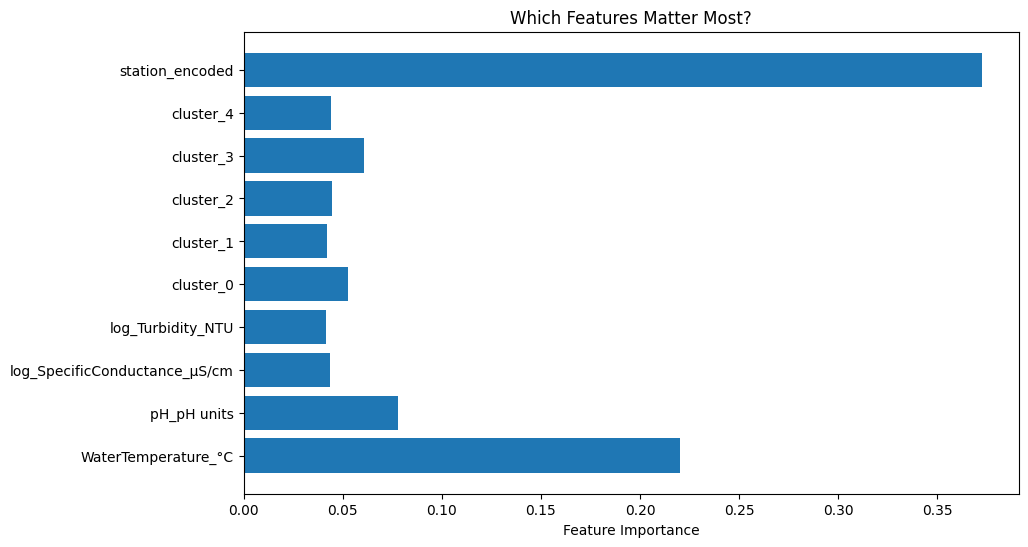

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Prepare Features (X) and Target (y)
# -------------------------------------------------------
# We exclude the raw 'station_id' (we use encoded version later)
# We exclude 'sample_date' for this specific regression (or extract month/year if needed)
# We use the log-transformed versions of Conductance and Turbidity
features = [
    'WaterTemperature_°C',
    'pH_pH units',
    'log_SpecificConductance_µS/cm',
    'log_Turbidity_NTU',
    'spatial_cluster',
    'station_id' # kept for splitting, will be encoded/dropped later
]

target = 'DissolvedOxygen_mg/L'

X = df_selected[features].copy()
y = df_selected[target]

# 2. One-Hot Encode 'spatial_cluster'
# -------------------------------------------------------
X = pd.get_dummies(X, columns=['spatial_cluster'], prefix='cluster')

# 3. Train/Test Split
# -------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Correct Target Encoding (Inside the Split)
# -------------------------------------------------------
# Calculate mean DO per station on TRAIN set only
station_means = y_train.groupby(X_train['station_id']).mean()
global_mean = y_train.mean()

# Map to Train and Test
# If a station in Test wasn't in Train, fill with global mean
X_train['station_encoded'] = X_train['station_id'].map(station_means).fillna(global_mean)
X_test['station_encoded'] = X_test['station_id'].map(station_means).fillna(global_mean)

# Drop the original station_id now
X_train = X_train.drop(columns=['station_id'])
X_test = X_test.drop(columns=['station_id'])

# 5. Train XGBoost Model
# -------------------------------------------------------
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# 6. Evaluate
# -------------------------------------------------------
y_pred = model.predict(X_test)
# Calculate RMSE manually to handle version differences
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

# 7. Feature Importance Plot
# -------------------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, model.feature_importances_)
plt.xlabel('Feature Importance')
plt.title('Which Features Matter Most?')
plt.show()

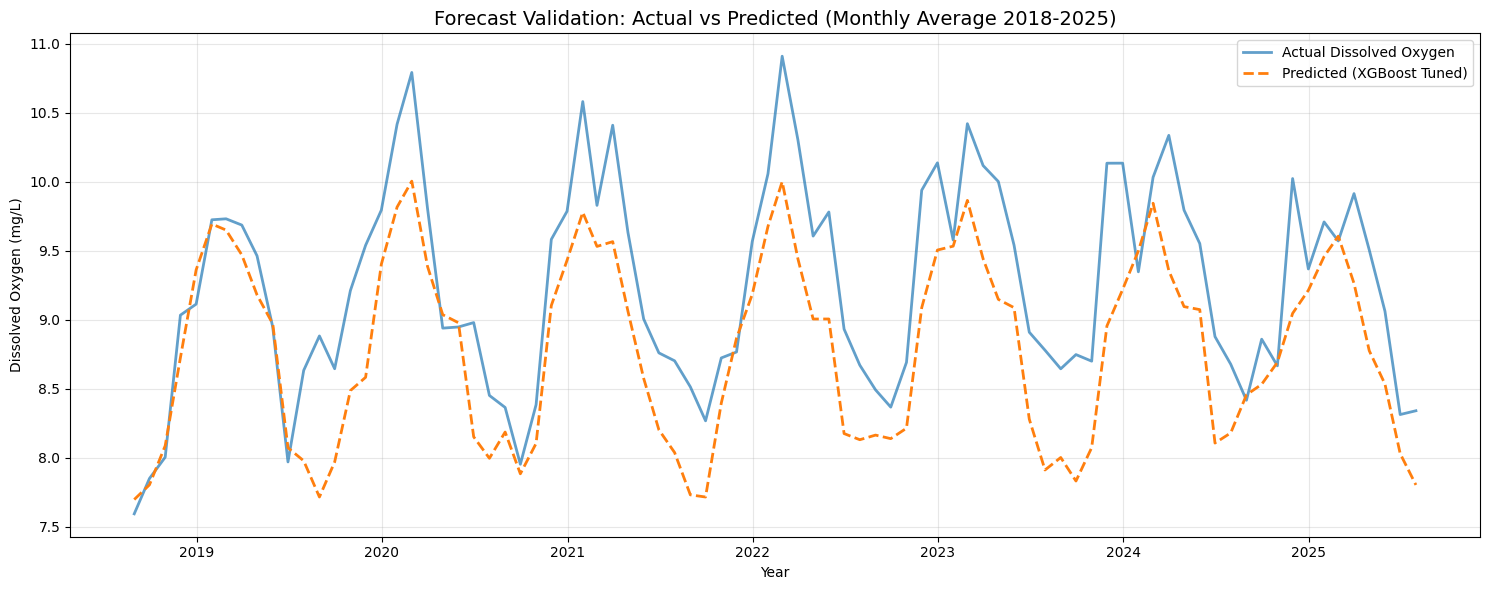

Interpretation: The plot shows how well the model captures seasonal trends (the up-and-down pattern).


In [28]:
import matplotlib.dates as mdates

# Use the best tuned model
final_model = best_xgb

# Make predictions on the test set
X_test_sorted = X_test.copy()
X_test_sorted['prediction'] = final_model.predict(X_test)
X_test_sorted['actual'] = y_test

# We need the dates back for plotting!
# Since we split by index on sorted data, we can retrieve dates from the original sorted df
test_indices = X_test.index
test_dates = df_sorted.loc[test_indices, 'sample_date']

X_test_sorted['date'] = test_dates

# Sort just in case (though should be sorted)
X_test_sorted = X_test_sorted.sort_values('date')

# Plotting a subset (e.g., last 500 points) or a resampled mean to make it readable
# Let's plot the monthly average of Actual vs Predicted to see the trend clearly
# Updated 'M' to 'ME' to avoid FutureWarning
monthly_avg = X_test_sorted.set_index('date')[['actual', 'prediction']].resample('ME').mean()

plt.figure(figsize=(15, 6))
plt.plot(monthly_avg.index, monthly_avg['actual'], label='Actual Dissolved Oxygen', color='tab:blue', alpha=0.7, linewidth=2)
plt.plot(monthly_avg.index, monthly_avg['prediction'], label='Predicted (XGBoost Tuned)', color='tab:orange', linestyle='--', linewidth=2)

plt.title('Forecast Validation: Actual vs Predicted (Monthly Average 2018-2025)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.legend()
plt.grid(True, alpha=0.3)

# Format Date Axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

print("Interpretation: The plot shows how well the model captures seasonal trends (the up-and-down pattern).")

In [26]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# 1. Define the Parameter Grid
# -------------------------------------------------------
# We focus on the most impactful parameters to save computation time

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5]
}

# 2. Setup Time-Series Cross-Validation
# -------------------------------------------------------
# This respects the timeline. It splits training data into growing windows.
# Fold 1: Train [2000-2005], Val [2006]
# Fold 2: Train [2000-2006], Val [2007]
# ...etc.
tscv = TimeSeriesSplit(n_splits=3)

# 3. Run Grid Search for XGBoost
# -------------------------------------------------------
print("Tuning XGBoost... (This may take a minute)")
grid_xgb = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid_xgb,
    cv=tscv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_xgb.fit(X_train, y_train)

print(f"Best XGBoost Params: {grid_xgb.best_params_}")
print(f"Best XGBoost CV Score (RMSE): {-grid_xgb.best_score_:.4f}")

# 4. Run Grid Search for Random Forest
# -------------------------------------------------------
print("\nTuning Random Forest... (This may take a minute)")
grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=tscv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)

print(f"Best Random Forest Params: {grid_rf.best_params_}")
print(f"Best Random Forest CV Score (RMSE): {-grid_rf.best_score_:.4f}")

# 5. Final Evaluation on Test Set
# -------------------------------------------------------
# We take the best models and evaluate them on the hold-out Test set (2018-2025)

best_xgb = grid_xgb.best_estimator_
best_rf = grid_rf.best_estimator_

pred_xgb_tuned = best_xgb.predict(X_test)
pred_rf_tuned = best_rf.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, pred_xgb_tuned))
r2_xgb = r2_score(y_test, pred_xgb_tuned)

rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf_tuned))
r2_rf = r2_score(y_test, pred_rf_tuned)

print("\n--- Final Tuned Performance ---")
print(f"Tuned XGBoost -> RMSE: {rmse_xgb:.4f}, R2: {r2_xgb:.4f}")
print(f"Tuned Random Forest -> RMSE: {rmse_rf:.4f}, R2: {r2_rf:.4f}")

Tuning XGBoost... (This may take a minute)
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best XGBoost Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best XGBoost CV Score (RMSE): 1.3905

Tuning Random Forest... (This may take a minute)
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest CV Score (RMSE): 1.4051

--- Final Tuned Performance ---
Tuned XGBoost -> RMSE: 1.5681, R2: 0.2214
Tuned Random Forest -> RMSE: 1.6059, R2: 0.1834


Training and Evaluating Models...
Ridge -> RMSE: 1.6582, R2: 0.1294
Lasso -> RMSE: 1.6370, R2: 0.1514
RandomForest -> RMSE: 1.6069, R2: 0.1824
XGBoost -> RMSE: 1.5524, R2: 0.2369


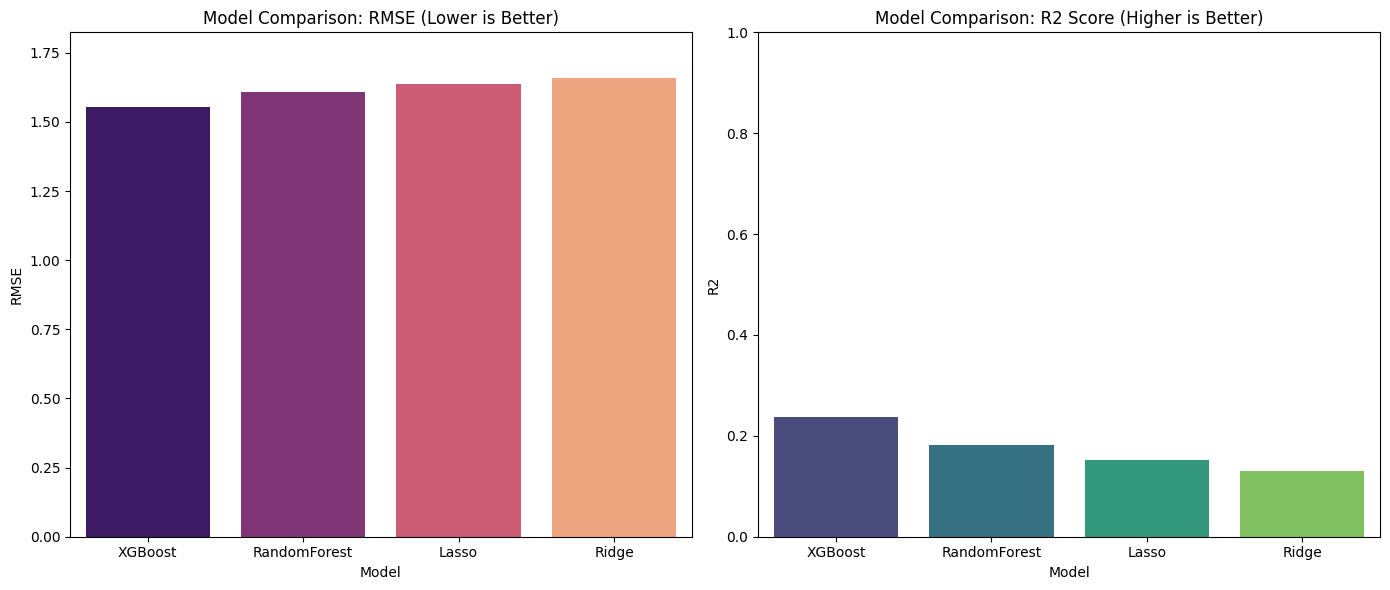

,Model,RMSE,R2
3,XGBoost,1.552426,0.236884
2,RandomForest,1.606918,0.182370
1,Lasso,1.637037,0.151434
0,Ridge,1.658155,0.129399


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso

# Initialize models
models = {
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'RandomForest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'XGBoost': model_time # Re-using the already trained XGBoost
}

metrics_list = []

print("Training and Evaluating Models...")
for name, model in models.items():
    # Fit (skip for XGBoost as it's already fitted)
    if name != 'XGBoost':
        model.fit(X_train, y_train)

    # Predict
    pred = model.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)

    metrics_list.append({'Model': name, 'RMSE': rmse, 'R2': r2})
    print(f"{name} -> RMSE: {rmse:.4f}, R2: {r2:.4f}")

# Create comparison dataframe
metrics_df = pd.DataFrame(metrics_list).sort_values('R2', ascending=False)

# Visualize Comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# RMSE Plot
sns.barplot(data=metrics_df, x='Model', y='RMSE', ax=axes[0], hue='Model', legend=False, palette='magma')
axes[0].set_title('Model Comparison: RMSE (Lower is Better)')
axes[0].set_ylim(0, metrics_df['RMSE'].max() * 1.1)

# R2 Plot
sns.barplot(data=metrics_df, x='Model', y='R2', ax=axes[1], hue='Model', legend=False, palette='viridis')
axes[1].set_title('Model Comparison: R2 Score (Higher is Better)')
axes[1].set_ylim(0, 1.0)

plt.tight_layout()
plt.show()

display(metrics_df)